<a href="https://colab.research.google.com/github/infinitebhat/Customer-Segmentation-using-RFM-Analysis/blob/main/Kmeans_with_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import scale

from sklearn.cluster import KMeans


In [98]:
RFM1 = pd.read_csv("/content/RFM.csv")
RFM1.head()

,Unnamed: 0,Customer ID,Recency,Frequency,MonetaryValue
0,0,1,7.0,11.0,3018.09
1,1,2,128.0,3.0,2226.26
2,2,3,102.0,8.0,3362.81
3,3,4,195.0,2.0,220.57
4,4,5,16.0,6.0,2394.94


In [99]:
RFM1=RFM1.drop(columns='Unnamed: 0')
RFM1.head()

,Customer ID,Recency,Frequency,MonetaryValue
0,1,7.0,11.0,3018.09
1,2,128.0,3.0,2226.26
2,3,102.0,8.0,3362.81
3,4,195.0,2.0,220.57
4,5,16.0,6.0,2394.94


In [100]:
RFM1.head()

,Customer ID,Recency,Frequency,MonetaryValue
0,1,7.0,11.0,3018.09
1,2,128.0,3.0,2226.26
2,3,102.0,8.0,3362.81
3,4,195.0,2.0,220.57
4,5,16.0,6.0,2394.94


In [101]:
RFM1=RFM1[:-2]
RFM1.tail()

,Customer ID,Recency,Frequency,MonetaryValue
3489,3497,52.0,3.0,1648.320000
3490,3498,127.0,6.0,3147.330000
3491,3499,51.0,7.0,4955.250000
3492,3500,144.0,6.0,1785.860000
3493,5034,84.0,3.0,269.484972


In [102]:
RFM1.isna

<bound method DataFrame.isna of      Customer ID  Recency  Frequency  MonetaryValue
0              1      7.0       11.0    3018.090000
1              2    128.0        3.0    2226.260000
2              3    102.0        8.0    3362.810000
3              4    195.0        2.0     220.570000
4              5     16.0        6.0    2394.940000
...          ...      ...        ...            ...
3489        3497     52.0        3.0    1648.320000
3490        3498    127.0        6.0    3147.330000
3491        3499     51.0        7.0    4955.250000
3492        3500    144.0        6.0    1785.860000
3493        5034     84.0        3.0     269.484972

[3494 rows x 4 columns]>

In [103]:
RFM=RFM1.drop(["Customer ID"], axis=1)

In [104]:
RFM.head()

,Recency,Frequency,MonetaryValue
0,7.0,11.0,3018.09
1,128.0,3.0,2226.26
2,102.0,8.0,3362.81
3,195.0,2.0,220.57
4,16.0,6.0,2394.94


In [105]:
RFM.columns = ['Recency','Frequency','Amount']
RFM.head()

,Recency,Frequency,Amount
0,7.0,11.0,3018.09
1,128.0,3.0,2226.26
2,102.0,8.0,3362.81
3,195.0,2.0,220.57
4,16.0,6.0,2394.94


In [106]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [107]:
hopkins(RFM)

0.9191830207169367

The above Value shows we can have above 90% accuracy of clustering.

Lets start with Kmeans Clustering Modelling

In [108]:
#Lets take number_of_cluster=6
model_clus6 = KMeans(n_clusters =6, max_iter=50)
model_clus6.fit(RFM)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [109]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(RFM)
    sse_.append([k, silhouette_score(RFM, kmeans.labels_)])

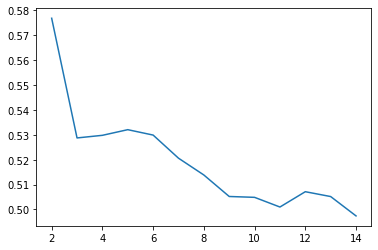

In [110]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

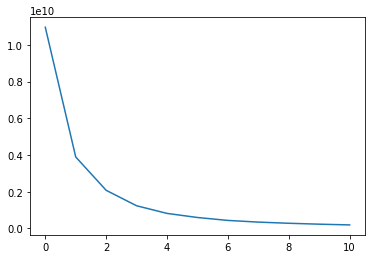

In [111]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,12)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(RFM)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [112]:
pd.RangeIndex(len(RFM.index))

RangeIndex(start=0, stop=3494, step=1)

In [123]:
RFM_Kmeans = pd.concat([RFM1, pd.Series(model_clus6.labels_)], axis=1)
RFM_Kmeans.columns = ['CustomerID','Recency', 'Frequency', 'Amount','ClusterID']

#RFM_kMeans.Recency = RFM_kMeans.Recency.dt.days
km_clusters_frequency = pd.DataFrame(RFM_Kmeans.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = 	pd.DataFrame(RFM_Kmeans.groupby(["ClusterID"]).Recency.mean())
km_clusters_amount = 	pd.DataFrame(RFM_Kmeans.groupby(["ClusterID"]).Amount.mean())

In [124]:
RFM_Kmeans.head()

,CustomerID,Recency,Frequency,Amount,ClusterID
0,1,7.0,11.0,3018.09,0
1,2,128.0,3.0,2226.26,3
2,3,102.0,8.0,3362.81,0
3,4,195.0,2.0,220.57,1
4,5,16.0,6.0,2394.94,3


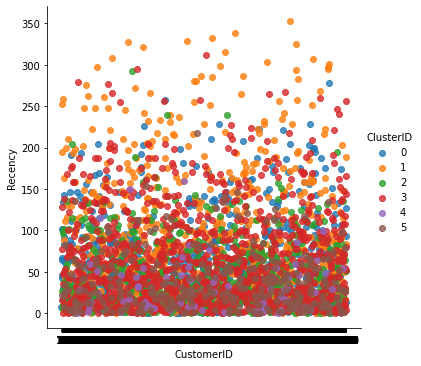

In [125]:
facet = sns.lmplot(data=RFM_Kmeans, x='CustomerID', y='Recency', hue='ClusterID', 
                   fit_reg=False, legend=True, legend_out=True)

In [136]:
df=RFM_Kmeans.drop(columns='Recency')

In [137]:
df.head()

,CustomerID,Frequency,Amount,ClusterID
0,1,11.0,3018.09,0
1,2,3.0,2226.26,3
2,3,8.0,3362.81,0
3,4,2.0,220.57,1
4,5,6.0,2394.94,3


In [140]:
df.head()

,CustomerID,Recency,Frequency,ClusterID
0,1,7.0,11.0,0
1,2,128.0,3.0,3
2,3,102.0,8.0,0
3,4,195.0,2.0,1
4,5,16.0,6.0,3


In [141]:
df=df.drop(columns=['Recency','Frequency'])

In [142]:
df.head()

,CustomerID,ClusterID
0,1,0
1,2,3
2,3,0
3,4,1
4,5,3


In [144]:
df.groupby(['ClusterID'])

In [145]:
df.head()

,CustomerID,ClusterID
0,1,0
1,2,3
2,3,0
3,4,1
4,5,3


In [147]:
df.describe

<bound method NDFrame.describe of      CustomerID  ClusterID
0             1          0
1             2          3
2             3          0
3             4          1
4             5          3
...         ...        ...
3489       3497          3
3490       3498          0
3491       3499          2
3492       3500          3
3493       5034          1

[3494 rows x 2 columns]>

In [148]:
RFM_Kmeans.head(1)

,CustomerID,Recency,Frequency,Amount,ClusterID
0,1,7.0,11.0,3018.09,0


In [154]:
RFM_Kmeans.to_csv('/content/RFM_Kmeans_results.csv')

In [149]:
Customer_aggregate = RFM_Kmeans.groupby('ClusterID').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Amount': ['mean','count']
}).round(1)

print(Customer_aggregate)

          Recency Frequency  Amount      
             mean      mean    mean count
ClusterID                                
0            55.7       6.2  3456.2   839
1            92.8       3.4   941.3   684
2            45.3       7.3  4745.9   578
3            62.1       5.0  2249.9  1057
4            33.5       9.7  8550.6    69
5            38.1       8.6  6274.7   267


In [152]:
!pip install squarify
import squarify

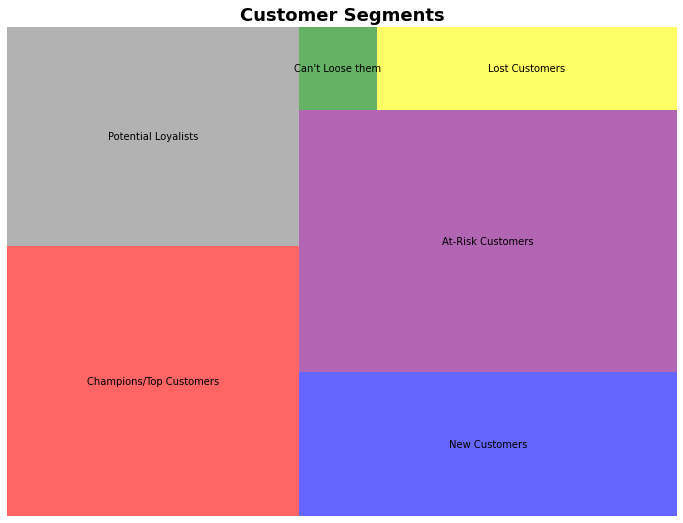

In [153]:
Customer_aggregate.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count']

fig = plt.gcf()
ax= fig.add_subplot()
fig.set_size_inches(12,9)

squarify.plot(sizes=Customer_aggregate['Count'],
             label=["Champions/Top Customers", 
                    "Potential Loyalists",
                    "New Customers",
                    "At-Risk Customers",
                    "Can't Loose them",
                    'Lost Customers'], color=['red','grey','blue','purple','green','yellow'], alpha=.6)

plt.title('Customer Segments', fontsize= 18, fontweight='bold')
plt.axis('off')
plt.show()